In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm_notebook

In [2]:
def extractFace(img, fc, tol, outgray=False):
    H, W, D = img.shape
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_coords = fc.detectMultiScale(gray, 1.2, tol, minSize=(60, 60))
    
    if len(face_coords) == 1:
        x, y, w, h = face_coords[0]
    elif len(face_coords) == 0:
        return None
    else:
        max_area = 0
        index = 0
        for i in range(len(face_coords)):
            _, _, wi, hi = face_coords[i]
            area = wi*hi
            if area > max_area:
                max_area = area
                index = i
        x, y, w, h = face_coords[index]
    
    if outgray==True:
        crop = gray[y:y+w, x:x+h]
    else:
        crop = img[y:y+w, x:x+h]
    
    return crop    

In [3]:
path = os.getcwd()
path

'/home/lh2910'

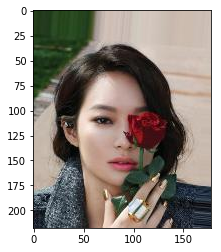

In [4]:
fc = cv2.CascadeClassifier(path+'/haarcascade_frontalface_default.xml')
img = cv2.imread(path+'/data/000507.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

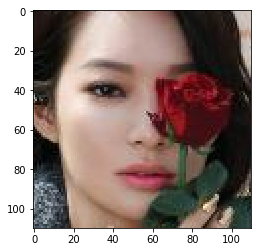

In [4]:
fc = cv2.CascadeClassifier(path+'/haarcascade_frontalface_default.xml')
img = cv2.imread(path+'/data/000507.jpg')
crop = extractFace(img, fc, 20)
rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [5]:
# Color Output

img_paths = glob.glob(path+'/data/*.jpg')
destination = '/home/lh2910/faces/'
fc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
for img_path in tqdm_notebook(img_paths):
    img = cv2.imread(img_path)
    crop = extractFace(img, fc, 20)
    if crop is not None:
        cv2.imwrite(destination+img_path.split('/')[-1], crop)

In [ ]:
# Grayscale Output

# img_paths = glob.glob(path+'/data/*.jpg')
# destination = '/home/lh2910/faces_gray/'
# fc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# for img_path in tqdm_notebook(img_paths):
#     img = cv2.imread(img_path)
#     crop = extractFace(img, fc, 20, outgray=True)
#     if crop is not None:
#         cv2.imwrite(destination+img_path.split('/')[-1], crop)